In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate


In [2]:
parser = lambda date: pd.datetime.strptime(date, '%Y%m')
train_data = pd.read_csv('../data/yancheng_train.csv',parse_dates=['sale_date'],date_parser=parser)
train_data.columns

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['sale_date', 'class_id', 'sale_quantity', 'brand_id', 'compartment',
       'type_id', 'level_id', 'department_id', 'TR', 'gearbox_type',
       'displacement', 'if_charging', 'price_level', 'price', 'driven_type_id',
       'fuel_type_id', 'newenergy_type_id', 'emission_standards_id',
       'if_MPV_id', 'if_luxurious_id', 'power', 'cylinder_number',
       'engine_torque', 'car_length', 'car_width', 'car_height',
       'total_quality', 'equipment_quality', 'rated_passenger', 'wheelbase',
       'front_track', 'rear_track'],
      dtype='object')

In [3]:
# class_ids = np.unique(train_data['class_id'])
train_data.sort_values(by=['sale_date'],inplace=True)
sale_quantity_perclass = train_data[['sale_date','class_id','sale_quantity']].groupby(by=['sale_date','class_id'],as_index=False).sum()

In [4]:
np.unique(sale_quantity_perclass['sale_date'],return_counts=True)

(array(['2012-01-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000',
        '2012-03-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
        '2012-05-01T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
        '2012-07-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
        '2012-09-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
        '2012-11-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
        '2013-01-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
        '2013-03-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
        '2013-05-01T00:00:00.000000000', '2013-06-01T00:00:00.000000000',
        '2013-07-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
        '2013-09-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
        '2013-11-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000',
        '2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
        '2014-03-01T00:00:00.000000000

In [5]:
classes, class_sale_counts = np.unique(sale_quantity_perclass['class_id'],return_counts=True)
classes, class_sale_counts

(array([103507, 124140, 125403, 136916, 169673, 175962, 178529, 186250,
        194201, 194450, 198427, 206765, 209945, 219195, 221795, 245609,
        248352, 249875, 250658, 265980, 270690, 281301, 281792, 289386,
        289403, 290854, 291086, 291514, 302513, 304458, 308913, 321683,
        340175, 347384, 348641, 349023, 350259, 354068, 356986, 359378,
        360648, 376193, 378356, 378536, 379265, 379876, 384924, 392593,
        395234, 401052, 409854, 412240, 416749, 417803, 425432, 436105,
        437063, 437598, 453752, 468392, 472603, 475895, 481950, 482497,
        492952, 496459, 501564, 510309, 516750, 526401, 527765, 527809,
        540712, 559132, 560265, 569154, 576298, 580470, 580634, 587678,
        591790, 597927, 603972, 612523, 614059, 619401, 621073, 628041,
        649213, 651347, 651782, 653436, 654134, 671482, 682651, 683364,
        687270, 692703, 693436, 713651, 714150, 714152, 714860, 725137,
        732758, 735971, 736094, 739296, 741152, 743957, 745137, 

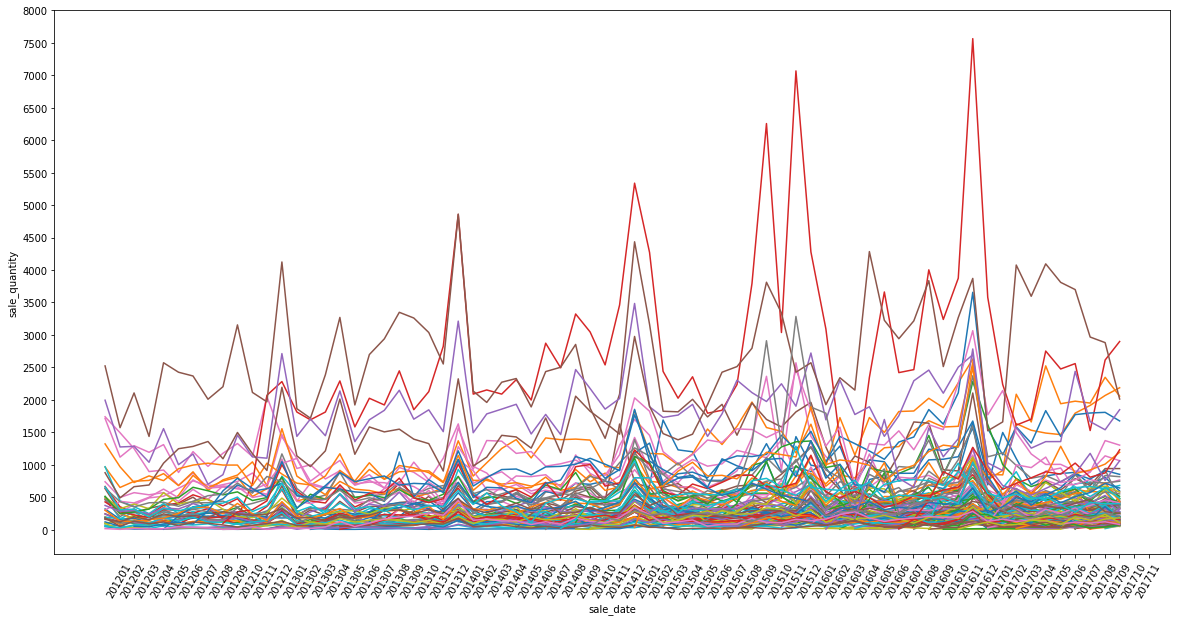

In [6]:
fig = plt.figure(figsize=(20,10))
ax1=fig.add_subplot(111)
for id in classes:
    tp = sale_quantity_perclass[sale_quantity_perclass.class_id == id]
    ax1.plot(tp.sale_date,tp.sale_quantity)

ax1.set_xlabel('sale_date')
ax1.set_xticks(pd.date_range(pd.datetime.strptime('201201','%Y%m'),pd.datetime.strptime('201712','%Y%m'),freq='M'))
ax1.set_xticklabels(pd.date_range(pd.datetime.strptime('201201','%Y%m'),pd.datetime.strptime('201712','%Y%m'),freq='M'),rotation=60)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y%m'))
ax1.set_ylabel('sale_quantity')
ax1.set_yticks(np.arange(0,8500,500))
plt.savefig('sales.png')
plt.show()
    

In [18]:
sale_quantity_perclass[sale_quantity_perclass.class_id.isin(classes[class_sale_counts<=12])].sort_values(by=['class_id','sale_date'])

,sale_date,class_id,sale_quantity
4910,2017-06-01,169673,67
5040,2017-07-01,169673,57
5175,2017-08-01,169673,86
5311,2017-09-01,169673,219
5451,2017-10-01,169673,152
5315,2017-09-01,194201,239
5455,2017-10-01,194201,378
4067,2016-11-01,249875,9
4185,2016-12-01,249875,138
4303,2017-01-01,249875,156


In [ ]:
from preprocess.gen_time_series import gen_sale_quantity_series
gen_sale_quantity_series()